In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("/home/catalina/Desktop/Programas/Parcial1/spectrum_data.dat") # Carga el archivo como un arreglo de numeros
L_desord=[data[i-1:i,0:1][0][0] for i in range(1,len(data)+1)] #Longitud de onda
F_desord=[data[i-1:i,1:2][0][0] for i in range(1,len(data)+1)] #Flujo monocromatico

x_list,y_list=zip(*sorted(zip(L_desord,F_desord)))

#x_list=[300.,495.9,691.8,1500.]
#y_list=[15.22,33.04,26.5,4.625]

In [3]:
n = len(x_list)-1 #3/h[] n=3

x = np.zeros(n+1)

a = np.zeros(n+1)
b = np.zeros(n+1)
c = np.zeros(n+1)
d = np.zeros(n+1)

l  = np.zeros(n+1)
mu = np.zeros(n+1)
z  = np.zeros(n+1)

va = np.zeros(n+1)

h = np.zeros(n)


for i in range(0,len(x)):
    x[i] = x_list[i]
    a[i] = y_list[i]

#step 1

for i in range(0,n):
    h[i]=x[i+1]-x[i]

#step 2

for i in range(1,n):
    va[i] = 3/h[i] * (a[i+1]-a[i]) - 3/h[i-1] * (a[i]-a[i-1])
    
#step 3, solucion del sistema de ecuaciones lineales


l[0] = 1
mu[0] = 0
z[0] = 0

for i in range(1,n):
    l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
    mu[i] = h[i]/l[i]
    z[i] = (va[i]-h[i-1]*z[i-1])/l[i]
        
l[n] = 1
z[n] = 0
c[n] = 0

for j in range(n-1,-1,-1):
    c[j] = z[j]-mu[j]*c[j+1]
    b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
    d[j] = (c[j+1]-c[j])/(3*h[j])
    

#print("aj = ",a)
#print("bj = ",b)
#print("cj = ",c)
#print("dj = ",d)
    
x_array = np.linspace(min(x_list),max(x_list),100)

y_array = []

 ## a) 

Para los puntos (300.,15,22),(495.9,33.04),(691.8,26.5),(1500.0,4.625) se generan tres intervalos ya que los splines van hasta n-1, donde n es el número de datos.

aj =  [15.22  33.04  26.5    4.625]

bj =  [ 0.12298709  0.02692015 -0.05792648  0.        ]

cj =  [ 0.00000000e+00 -4.90387684e-04  5.72757325e-05  0.00000000e+00]

dj =  [-8.34418384e-07  9.31875815e-07 -2.36227553e-08  0.00000000e+00]

## b) 

   En el subintervalo [300.0,495.9]

$ s_0= 15.22 + .12298709(x-300.) +0(x-300.)^2 - 8.34418384e-07(x-300.)^3 $
  
   En el subintervalo [495.9,691.8]
   
$ s_1= 33.04 + 0.02692015(x-495.9) - 4.90387684e-04(x-495.9)^2 - 9.31875815e-07(x-495.9)^3 $

   En el subintervalo [691.8,1500.]
   
$ s_2= 26.5  - 0.05792648(x-691.8) + 5.72757325e-05(x-691.8)^2 - 2.36227553e-08(x-691.8)^3 $


## b) Gráfica

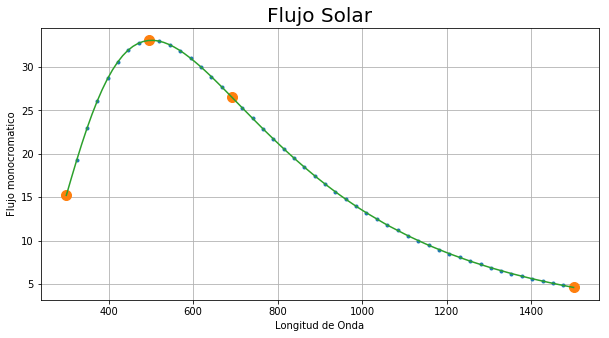

In [4]:
for i in range(0,len(x_array)):
    for j in range(0,n):
        if x[j]<=x_array[i]<x[j+1]:
            s = a[j]+b[j]*(x_array[i]-x[j]) + c[j]*(x_array[i]-x[j])**2 + d[j]*(x_array[i]-x[j])**3
            y_array.append(s)
    if x_array[i]==x[n]:
        s = a[n]+b[n]*(x_array[i]-x[n]) + c[n]*(x_array[i]-x[n])**2 + d[n]*(x_array[i]-x[n])**3
        y_array.append(s)

    

fig=plt.figure(figsize=(10,5))
ax=plt.axes()
plt.title('Flujo Solar', fontsize=20)
ax.grid()
ax.plot(x_list,y_list,'.')

x2_list=[300.,495.9,691.8,1500.]
y2_list=[15.22,33.04,26.5,4.625]

ax.plot(x2_list,y2_list,'o',markersize= 10)
ax.plot(x_array,y_array)
plt.xlabel('Longitud de Onda')
plt.ylabel('Flujo monocromatico')
plt.show()